# RabbitMQ Events Data V2 Jupyter Notebook
    this notebook is for visualizing trends, calculating activity rates within different routing keys
    and headers.node/ headers.name combinations in RabbitMQ data V2,and finally generating new datasets with the obtained activity rate results.

## 1. Import Libraries and utilities

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
#from tabulate import tabulate

import numpy as np
import pandas as pd
import os
import datetime as dt


## 2. Load RabbitMQ Events Data

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
from config import *
#Paths defined in Config file python

#Saas Paths
    #raw_saas_path  
    #proc_saas_path  
    #raw_saas_V2 
#RabbitMQ paths
    #raw_evts_path  
    #proc_evts_path  
    #raw_evts_V2 

#function for loading data
def load_data(csv_path):
    return pd.read_csv(csv_path,\
                    parse_dates=['timestamp'] ,index_col=['timestamp'])#comment if timestamp indexing not wanted
                      

events = load_data(raw_evts_v2 )




C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (9,10,11,12,13,15,21,22,25,26,27,28,29,30,31,32,33,34,44,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
events

,_id,routing_key,headers.timestamp_in_ms,headers.node,headers.name,headers.pid,headers.vhost,headers.prefetch_count,headers.consumer_tag,headers.channel,headers.exclusive,headers.arguments,headers.ack_required,headers.user_who_performed_action,headers.queue,headers.number,headers.connection,headers.user,headers.ssl_cipher,headers.connected_at,headers.type,headers.ssl,headers.timeout,headers.frame_max,headers.protocol,headers.client_properties.0,headers.client_properties.1,headers.client_properties.2,headers.client_properties.3,headers.client_properties.4,headers.client_properties.5,headers.client_properties.6,headers.host,headers.auth_mechanism,headers.ssl_protocol,headers.peer_cert_subject,headers.ssl_key_exchange,headers.peer_cert_validity,headers.peer_port,headers.ssl_hash,headers.peer_cert_issuer,headers.channel_max,headers.port,headers.peer_host,headers.connection_name,headers.connection_type,_class
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-04 18:07:22+00:00,5ef617c05f1503000192cc7a,binding.created,1588615642728,NaN,NaN,NaN,/,NaN,NaN,NaN,NaN,[ ],NaN,admin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.interop.messaging.monitoring.event.doma...
2020-05-04 18:07:22+00:00,5ef617c05f1503000192cc7b,connection.closed,1588615642957,rabbit@CSLSAASPBS1,127.0.0.1:58702 -> 127.0.0.1:5672,<rabbit@CSLSAASPBS1.1.28905.4>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.interop.messaging.monitoring.event.doma...
2020-05-04 18:10:24+00:00,5ef617c05f1503000192cc7c,connection.closed,1588615824233,rabbit@CSLSAASPBS1,127.0.0.1:58706 -> 127.0.0.1:5672,<rabbit@CSLSAASPBS1.1.29035.4>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.interop.messaging.monitoring.event.doma...
2020-05-04 18:13:26+00:00,5ef617c05f1503000192cc7d,connection.closed,1588616006533,rabbit@CSLSAASPBS1,127.0.0.1:58710 -> 127.0.0.1:5672,<rabbit@CSLSAASPBS1.1.29127.4>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.interop.messaging.monitoring.event.doma...
2020-05-04 18:16:27+00:00,5ef617c05f1503000192cc7e,connection.closed,1588616187210,rabbit@CSLSAASPBS1,127.0.0.1:58714 -> 127.0.0.1:5672,<rabbit@CSLSAASPBS1.1.29223.4>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.interop.messaging.monitoring.event.doma...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26 15:44:00+00:00,5ef6186a5f1503000198f5b7,connection.created,1593186240213,rabbit@CSLSAASPBS1,10.238.22.8:37472 -> 10.238.22.5:5672,<rabbit@CSLSAASPBS1.1.21562.3>,/,NaN,NaN,NaN,NaN,NaN,NaN,bus-consolesaas,NaN,NaN,NaN,bus-consolesaas,NaN,1.593186e+12,network,False,60.0,131072.0,"{0,9,1}","{<<""connection_name"">>,longstr,<<""rabbitConnec...","{<<""product"">>,longstr,<<""RabbitMQ"">>}","{<<""copyright"">>,longstr,<<""Copyright (c) 2007...","{<<""capabilities"">>,table,[{<<""exchange_exchan...","{<<""information"">>,longstr,<<""Licensed under t...","{<<""version"">>,longstr,<<""5.1.2"">>}","{<<""platform"">>,longstr,<<""Java"">>}","{0,0,0,0,0,65535,2798,5637}",PLAIN,NaN,NaN,NaN,NaN,37472.0,NaN,NaN,0.0,5672.0,"{0,0,0,0,0,65535,2798,5640}",NaN,NaN,com.bl.interop.messaging.monitoring.event.doma...
2020-06-26 15:44:00+00:00,5ef6186a5f1503000198f5b8,channel.created,1593186240236,NaN,10.238.22.8:37472 -> 10.238.22.5:5672 (1),<rabbit@CSLSAASPBS1.1.21571.3>,/,NaN,NaN,NaN,NaN,NaN,NaN,bus-consolesaas,NaN,1.0,<

In [5]:
print('events total size ')
print(events.shape)
print('')
print('events columns')
print(events.columns)

events total size 
(403778, 47)

events columns
Index(['_id', 'routing_key', 'headers.timestamp_in_ms', 'headers.node',
       'headers.name', 'headers.pid', 'headers.vhost',
       'headers.prefetch_count', 'headers.consumer_tag', 'headers.channel',
       'headers.exclusive', 'headers.arguments', 'headers.ack_required',
       'headers.user_who_performed_action', 'headers.queue', 'headers.number',
       'headers.connection', 'headers.user', 'headers.ssl_cipher',
       'headers.connected_at', 'headers.type', 'headers.ssl',
       'headers.timeout', 'headers.frame_max', 'headers.protocol',
       'headers.client_properties.0', 'headers.client_properties.1',
       'headers.client_properties.2', 'headers.client_properties.3',
       'headers.client_properties.4', 'headers.client_properties.5',
       'headers.client_properties.6', 'headers.host', 'headers.auth_mechanism',
       'headers.ssl_protocol', 'headers.peer_cert_subject',
       'headers.ssl_key_exchange', 'headers.peer_cert_

In [6]:

print('events Data starting date ')
print(events.index.min())
print('')
print('events Data Ending date')
print(events.index.max())

events Data starting date 
2020-05-04 18:07:22+00:00

events Data Ending date
2020-06-26 15:48:57+00:00


In [7]:
events.columns

Index(['_id', 'routing_key', 'headers.timestamp_in_ms', 'headers.node',
       'headers.name', 'headers.pid', 'headers.vhost',
       'headers.prefetch_count', 'headers.consumer_tag', 'headers.channel',
       'headers.exclusive', 'headers.arguments', 'headers.ack_required',
       'headers.user_who_performed_action', 'headers.queue', 'headers.number',
       'headers.connection', 'headers.user', 'headers.ssl_cipher',
       'headers.connected_at', 'headers.type', 'headers.ssl',
       'headers.timeout', 'headers.frame_max', 'headers.protocol',
       'headers.client_properties.0', 'headers.client_properties.1',
       'headers.client_properties.2', 'headers.client_properties.3',
       'headers.client_properties.4', 'headers.client_properties.5',
       'headers.client_properties.6', 'headers.host', 'headers.auth_mechanism',
       'headers.ssl_protocol', 'headers.peer_cert_subject',
       'headers.ssl_key_exchange', 'headers.peer_cert_validity',
       'headers.peer_port', 'headers.

## 3. Exploring the data

In [9]:
#events.info()
#events.isnull().sum()

# Check min value of index 
print('events data starting date')
print(events.index.min())

# Check max value of index 
print('events data ending date')
print(events.index.max())
print("")
#events['headers.queue'].value_counts()
#events['headers.name'].value_counts()
print('routing key values dataset v2')
events['routing_key'].value_counts()

events data starting date
2020-05-04 18:07:22+00:00
events data ending date
2020-06-26 15:48:57+00:00

routing key values dataset v2


channel.created                188993
channel.closed                 188952
connection.closed               25341
user.authentication.success       151
connection.created                151
consumer.created                   74
consumer.deleted                   33
binding.created                    17
exchange.created                    9
user.authentication.failure         8
queue.created                       8
exchange.deleted                    7
parameter.set                       7
parameter.cleared                   7
permission.created                  5
user.tags.set                       4
user.created                        3
permission.deleted                  2
topic.permission.created            2
user.password.changed               1
vhost.down                          1
vhost.created                       1
vhost.deleted                       1
Name: routing_key, dtype: int64

In [9]:
events['headers.name'].value_counts()

10.238.22.6:55420 -> 10.238.22.5:5672 (1)    36613
10.238.22.6:46016 -> 10.238.22.5:5672 (1)    28625
10.238.22.7:58644 -> 10.238.22.5:5672 (1)    27326
10.238.22.7:35540 -> 10.238.22.5:5672 (1)    23228
10.238.22.6:60978 -> 10.238.22.5:5672 (1)    17690
                                             ...  
127.0.0.1:59682 -> 127.0.0.1:5672                1
127.0.0.1:39078 -> 127.0.0.1:5672                1
127.0.0.1:54910 -> 127.0.0.1:5672                1
127.0.0.1:43896 -> 127.0.0.1:5672                1
127.0.0.1:43400 -> 127.0.0.1:5672                1
Name: headers.name, Length: 12970, dtype: int64

In [10]:
events['headers.user'].value_counts()


bus-consolesaas    188963
bus-relay             142
bus-portal             30
bus-blsenior            9
bus-legibase            6
admin                   2
bus-socle               1
Name: headers.user, dtype: int64

In [11]:
events['headers.connection_type'].value_counts()



network    159
Name: headers.connection_type, dtype: int64

In [12]:
events['headers.user_who_performed_action'].value_counts()

bus-consolesaas    377882
bus-relay             219
bus-portal             72
admin                  50
rmq-internal           31
bus-blsenior           15
bus-legibase            9
Name: headers.user_who_performed_action, dtype: int64

In [13]:
events['headers.channel_max'].value_counts()

2047.0    108
0.0        43
Name: headers.channel_max, dtype: int64

## 3. Features


## Add/compose Temporal Features from the timestamp

In [14]:

dates = pd.DatetimeIndex(events.index.values)
events['hour'] = dates.hour #create column containing the hour
events['season'] = (dates.month%12 + 3)//3 # Calculates the season (categorical)
events['year']=dates.year
events['month']=dates.month
events['day']=dates.day
events['minutes'] = dates.minute
events["dow"] = events.index.weekday #monday 0,tuesday 1 ,wed 2,thurs 3,fri 4,sat 5 ,sunday 6
events['seconds'] = dates.second

    the following blocks are for decomposing the dataset according to different routing_keys
    and extracting the later into csv files

In [15]:
df=events.copy()

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['route_key'] = LE.fit_transform(df['routing_key'])

LE.classes_


array(['binding.created', 'channel.closed', 'channel.created',
       'connection.closed', 'connection.created', 'consumer.created',
       'consumer.deleted', 'exchange.created', 'exchange.deleted',
       'parameter.cleared', 'parameter.set', 'permission.created',
       'permission.deleted', 'queue.created', 'topic.permission.created',
       'user.authentication.failure', 'user.authentication.success',
       'user.created', 'user.password.changed', 'user.tags.set',
       'vhost.created', 'vhost.deleted', 'vhost.down'], dtype=object)

In [16]:
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403778 entries, 0 to 403777
Data columns (total 57 columns):
 #   Column                             Non-Null Count   Dtype              
---  ------                             --------------   -----              
 0   timestamp                          403778 non-null  datetime64[ns, UTC]
 1   _id                                403778 non-null  object             
 2   routing_key                        403778 non-null  object             
 3   headers.timestamp_in_ms            403778 non-null  int64              
 4   headers.node                       25493 non-null   object             
 5   headers.name                       214689 non-null  object             
 6   headers.pid                        403437 non-null  object             
 7   headers.vhost                      189315 non-null  object             
 8   headers.prefetch_count             74 non-null      float64            
 9   headers.consumer_tag               10

In [17]:

channel_closed = df.loc[df['route_key'].isin([2])]
channel_created = df.loc[df['route_key'].isin([3])]

connect_closed = df.loc[df['route_key'].isin([4 ])]
connect_created = df.loc[df['route_key'].isin([ 5])]

consum_created = df.loc[df['route_key'].isin([6 ])]
consum_deleted = df.loc[df['route_key'].isin([7])]

bind_created = df.loc[df['route_key'].isin([0 ])]
bind_deleted = df.loc[df['route_key'].isin([ 1])]

queue_created = df.loc[df['route_key'].isin([13])]
queue_deleted = df.loc[df['route_key'].isin([ 14])]

user_authen_fail  = df.loc[df['route_key'].isin([16 ])]
user_authen_succ  = df.loc[df['route_key'].isin([ 17 ])]
user_created  = df.loc[df['route_key'].isin([ 18 ])]
user_deleted  = df.loc[df['route_key'].isin([19])]
user_pass_chg  = df.loc[df['route_key'].isin([20 ])]
user_tags  = df.loc[df['route_key'].isin([21])]


exchange_created = df.loc[df['route_key'].isin([8 ])]
exchange_deleted = df.loc[df['route_key'].isin([ 9])]

perm_created = df.loc[df['route_key'].isin([11])] #includes the topic.permission.created along with permissions
perm_deleted = df.loc[df['route_key'].isin([12])] #includes the topic.permission.created along with permissions
topic_perm = df.loc[df['route_key'].isin([15])] #includes the topic.permission.created along with permissions

nodes_stats = df.loc[df['route_key'].isin([10  ])]
vhost_stats = df.loc[df['route_key'].isin([ 22 ])]



## Keep only relevant features

In [18]:
df = events.copy()
df = df[["routing_key",
         "headers.timestamp_in_ms",
         "headers.node",
         "headers.name",
         "headers.vhost",
        "headers.consumer_tag",
         "headers.channel",
         "headers.peer_port",
        "headers.port",
         "headers.peer_host",
         "headers.connection_type",
        "headers.user_who_performed_action",
         "headers.queue",
        "headers.user",
         "headers.connection",
         "headers.host",
         "headers.ssl_hash",
         "headers.auth_mechanism",
         "headers.peer_host" ,
        "headers.connection_name",
         "headers.connection_type",
        "year",
         "month",
         "day",
         "hour",
         "minutes",
         "seconds"
]]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 403778 entries, 2020-05-04 18:07:22+00:00 to 2020-06-26 15:48:57+00:00
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   routing_key                        403778 non-null  object 
 1   headers.timestamp_in_ms            403778 non-null  int64  
 2   headers.node                       25493 non-null   object 
 3   headers.name                       214689 non-null  object 
 4   headers.vhost                      189315 non-null  object 
 5   headers.consumer_tag               107 non-null     object 
 6   headers.channel                    107 non-null     object 
 7   headers.peer_port                  310 non-null     float64
 8   headers.port                       151 non-null     float64
 9   headers.peer_host                  310 non-null     object 
 10  headers.connection_type            159 non-null     object

## Encode labels for different event types

In [20]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['route_key'] = LE.fit_transform(df['routing_key'])

LE.classes_

array(['binding.created', 'channel.closed', 'channel.created',
       'connection.closed', 'connection.created', 'consumer.created',
       'consumer.deleted', 'exchange.created', 'exchange.deleted',
       'parameter.cleared', 'parameter.set', 'permission.created',
       'permission.deleted', 'queue.created', 'topic.permission.created',
       'user.authentication.failure', 'user.authentication.success',
       'user.created', 'user.password.changed', 'user.tags.set',
       'vhost.created', 'vhost.deleted', 'vhost.down'], dtype=object)

*mappings :* 

    ['binding.created' 0, 'binding.deleted' 1 , 'channel.closed'2,
       'channel.created' 3, 'connection.closed' 4, 'connection.created' 5,
       'consumer.created' 6, 'consumer.deleted' 7, 'exchange.created' 8,
       'exchange.deleted' 9, 'node.node.stats' 10, 'permission.created' 11 ,
       'permission.deleted' 12 , 'queue.created' 13, 'queue.deleted' 14,
       'topic.permission.created' 15, 'user.authentication.failure' 16,
       'user.authentication.success' 17 , 'user.created' 18, 'user.deleted' 19,
       'user.password.changed' 20, 'user.tags.set' 21, 'vhost.down' 22]

## 4. General Histogram Visualizing

## Visualizing 2020 Histograms 

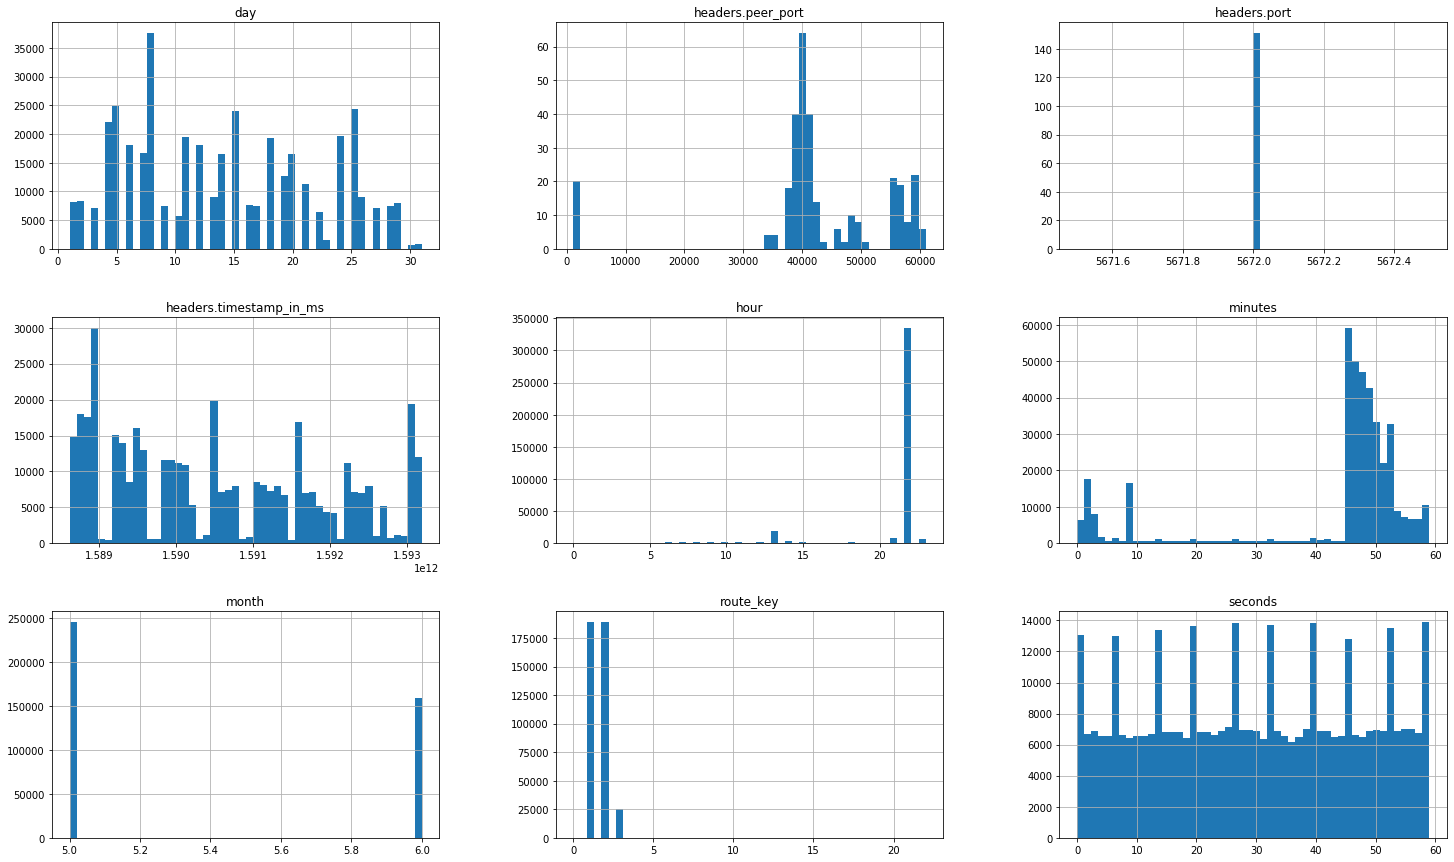

In [21]:
rec_2020 = df.loc['2020-05-01':'2020-06-30']
rec_2020 = rec_2020.drop(['year' ,'headers.ssl_hash'] ,axis=1)

rec_2020.hist(bins=50, figsize=(25,15))
plt.show()

*notes:* 
   
    hours : atfer 20h (21h 22h mostly)
    
    month:05 most active month (as our data records from  may to june)

    route_key: we notice that the most used routing_key is 
        'binding.deleted' (1) and 'channel.closed' (2),
       'channel.created' (3)

## 5. Stats and Properties

## Anomaly std function

    In the following section, we define a function called find_anomalies.

    This function allows to analyze some satistical properties of the dataset such as the mean ,the std and enables us to find the threshold for the data distribution.The previous is done based on the assumption that any datasamples lying outside the range of the mean value plus or minus 3 times the standard deviation is considered as
    noise or anomaly.

    Recall that within a normal distribution of data,68% of values are within one standard deviation of the mean
    95% within two standard deviation of the mean and 99.7% within 3 standard deviations.

    standard deviation the standard deviation is a measure of the amount of variation or dispersion of a set 
    of values. 

In [22]:
import numpy as np
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    print('DATA MEAN :')
    print(random_data_mean)
    print('  STD : ')
    print( random_data_std)
    
    # Set upper and lower limit to 3 standard deviation
    anomaly_cut_off = random_data_std * 3
    print("")
    print(' Anomaly_cut_off value (aka std * 3 value) ')
    print(anomaly_cut_off)
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print("")
    print("   LIMIT VALUES  :")
    print('upper_limit value')
    print(upper_limit)
    print('lower_limit value')
    print(lower_limit)
    
    # Find outliers
    anomalies = []
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return upper_limit,anomalies

## Median Absolute Deviation
    Knowing that our data is roughly normally distributed, we could use the std method, by which we would consider points to be outliers based on how much they deviate from the mean value; 
    
    However, the mean is not a robust statistic; It is heavily influenced by outliers, meaning that the outliers we are trying to detect would affect the method itself.

    What if we take the same method but, instead of using the mean and standard deviation we use the median and the deviation from the median? 
    The median is a robust statistic, meaning it will not be greatly affected by outliers. This is called the Robust Z-score method, and instead of using standard deviation, it uses the MAD (Median Absolute Deviation).

In [23]:
def mad_based_outlier(points, thresh=3.5):
    '''
    Returns a boolean array with True if points are outliers and False
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), 'Volume 16: How to Detect and
        Handle Outliers', The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor.'''
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    print('')
    print('median')
    print(median)

    
    print('')
    print('diff')
    print(diff)
    med_abs_deviation = np.median(diff)
    print('')
    print('med abs deviation')
    print(med_abs_deviation)
    
    modified_z_score = 0.6745 * diff / med_abs_deviation

    print('')
    print('modified z score ')
    print(modified_z_score)
    
    return (modified_z_score, (modified_z_score > thresh) )
   
    
    



## 2020 Activity rate (hourly and all events)

In [24]:
df['count'] = 0
groupped_data = df.groupby(['year','month','day','hour'
                                    ,'routing_key' ,'headers.name' ,
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX')
m=groupped_data.max()
print(m)

groupped_data


COUNT MAX
count    7939
dtype: int64


count
year month day hour routing_key        headers.name                              headers.user_who_performed_action       
2020 5     4   19   channel.created    10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
                                       10.238.22.7:35540 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
               20   channel.created    10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                        2
               22   channel.created    10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                     3550
                                       10.238.22.7:35540 -> 10.238.22.5:5672 (1) bus-consolesaas                     3530
...                                                                                                                   ...
     6     26  14   channel.created    10.238.22.7:38992 -> 10.238.22.5:5672 (1) bus-consolesaas                       10
                    connection.created 10.238.22.6:48462 -> 10.238.22.5:5672     bus-consolesaas                        1
               15   channel.created    10.238.22.6:55474 -> 10.238.22.5:5672 (1) bus-consolesaas                        4
                                       10.238.22.8:37472 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
                    connection.created 10.238.22.8:37472 -> 10.238.22.5:5672     bus-consolesaas                        1

[1236 rows x 1 columns]

In [25]:
upper_limit, anom = find_anomalies(groupped_data['count'])

DATA MEAN :
153.06553398058253
  STD : 
643.1897250456675

 Anomaly_cut_off value (aka std * 3 value) 
1929.5691751370025

   LIMIT VALUES  :
upper_limit value
2082.634709117585
lower_limit value
-1776.50364115642


In [26]:
#FETCH rows where data count is outside the limit range
groupped_data[groupped_data['count']> upper_limit ] 

count
year month day hour routing_key     headers.name                              headers.user_who_performed_action       
2020 5     4   22   channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                     3550
                                    10.238.22.7:35540 -> 10.238.22.5:5672 (1) bus-consolesaas                     3530
           5   22   channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                     3518
                                    10.238.22.7:35540 -> 10.238.22.5:5672 (1) bus-consolesaas                     3519
           6   22   channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                     3869
                                    10.238.22.7:35540 -> 10.238.22.5:5672 (1) bus-consolesaas                     3857
           7   22   channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                     3493
                                    10.238.22.7:35540 -> 10.238.22.5:5672 (1) bus-consolesaas                     3483
           8   22   channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                     3500
                                    10.238.22.7:35540 -> 10.238.22.5:5672 (1) bus-consolesaas                     3500
           11  22   channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                     3580
                                    10.238.22.7:35540 -> 10.238.22.5:5672 (1) bus-consolesaas                     3557
           12  22   channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                     3278
                                    10.238.22.7:49044 -> 10.238.22.5:5672 (1) bus-consolesaas                     3248
           14  22   channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                     3711
                                    10.238.22.7:49044 -> 10.238.22.5:5672 (1) bus-consolesaas                     3684
           15  22   channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                     3940
                                    10.238.22.7:49044 -> 10.238.22.5:5672 (1) bus-consolesaas                     2208
           18  22   channel.created 10.238.22.6:46016 -> 10.238.22.5:5672 (1) bus-consolesaas                     2680
                                    10.238.22.7:58644 -> 10.238.22.5:5672 (1) bus-consolesaas                     2679
           19  22   channel.created 10.238.22.6:46016 -> 10.238.22.5:5672 (1) bus-consolesaas                     2701
                                    10.238.22.7:58644 -> 10.238.22.5:5672 (1) bus-consolesaas                     2695
           20  22   channel.created 10.238.22.6:46016 -> 10.238.22.5:5672 (1) bus-consolesaas                     2661
                                    10.238.22.7:58644 -> 10.238.22.5:5672 (1) bus-consolesaas                     2648
           21  22   channel.created 10.238.22.6:46016 -> 10.238.22.5:5672 (1) bus-consolesaas                     2608
                                    10.238.22.7:58644 -> 10.238.22.5:5672 (1) bus-consolesaas                     2581
           25  22   channel.created 10.238.22.6:46016 -> 10.238.22.5:5672 (1) bus-consolesaas                     2822
                                    10.238.22.7:58644 -> 10.238.22.5:5672 (1) bus-consolesaas                     2810
     6     8   13   channel.created 10.238.22.6:48840 -> 10.238.22.5:5672 (1) bus-consolesaas                     7939
           15  22   channel.created 10.238.22.6:60978 -> 10.238.22.5:5672 (1) bus-consolesaas                     4132
           18  21   channel.created 10.238.22.6:59072 -> 10.238.22.5:5672 (1) bus-consolesaas                     3542
           20  22   channel.created 10.238.22.6:59072 -> 10.238.22.5:5672 (1) bus-consolesaas                     2326
           24  22   channel.created 10.238.22.6:55474 -> 10.238.22.

In [27]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'],x['month'], x['day'], x['hour']), axis=1)

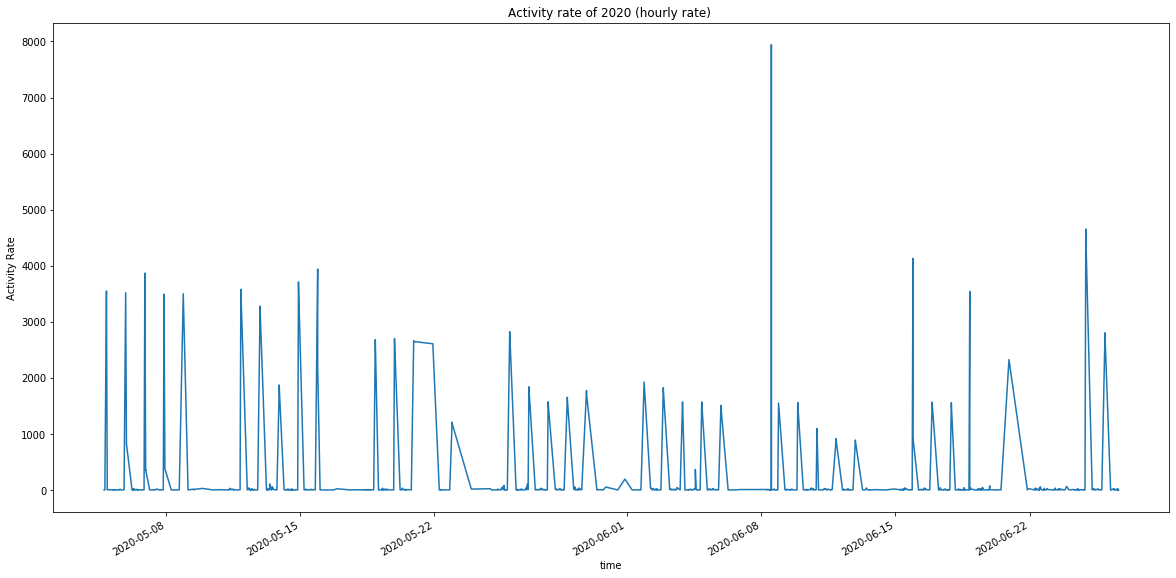

In [28]:
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Activity rate of 2020 (hourly rate) ')
plt.ylabel('Activity Rate')
plt.xlabel('time')

plt.show()

## Activity Rate (minutes Rate)

In [29]:
df['count'] = 0
groupped_data  = df.groupby(['year','month','day','hour','minutes'
                                    ,'routing_key' ,'headers.name' ,
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX')
m=groupped_data.max()
print(m)



print("")
print('COUNT MAX :')
m = (groupped_data.max()).iloc[0]
print(m)

print("")
print("Maximum Activity details: ")
max_act = groupped_data[groupped_data["count"]== m]
max_act





COUNT MAX
count    7939
dtype: int64

COUNT MAX :
7939

Maximum Activity details: 


,,,,,,,,count
year,month,day,hour,minutes,routing_key,headers.name,headers.user_who_performed_action,
2020,6,8,13,9,channel.created,10.238.22.6:48840 -> 10.238.22.5:5672 (1),bus-consolesaas,7939


In [30]:

print(' ALL GROUPPED DATA ')
groupped_data



 ALL GROUPPED DATA 


count
year month day hour minutes routing_key        headers.name                              headers.user_who_performed_action       
2020 5     4   19   8       channel.created    10.238.22.7:35540 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
                    9       channel.created    10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
               20   30      channel.created    10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
                    33      channel.created    10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
               22   2       channel.created    10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                        6
...                                                                                                                           ...
     6     26  15   0       channel.created    10.238.22.6:55474 -> 10.238.22.5:5672 (1) bus-consolesaas                        2
                    1       channel.created    10.238.22.6:55474 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
                    7       channel.created    10.238.22.6:55474 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
                    44      channel.created    10.238.22.8:37472 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
                            connection.created 10.238.22.8:37472 -> 10.238.22.5:5672     bus-consolesaas                        1

[4615 rows x 1 columns]

In [31]:
print(" CONSUMMER EVENTS STATS :")
print(" MAD :")

a, b =mad_based_outlier(groupped_data['count'])
print(a)
print('')
print('MAD Outlier detection')

anom = groupped_data[b].copy()
print('Threshold')
print(anom.min())
anom

 CONSUMMER EVENTS STATS :
 MAD :

median
[1.]

diff
[0. 0. 0. ... 0. 0. 0.]

med abs deviation
0.0

modified z score 
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]

MAD Outlier detection
Threshold
count    2
dtype: int64


C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in greater


count
year month day hour minutes routing_key     headers.name                              headers.user_who_performed_action       
2020 5     4   22   2       channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                        6
                    45      channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                       71
                                            10.238.22.7:35540 -> 10.238.22.5:5672 (1) bus-consolesaas                       69
                    46      channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                      298
                                            10.238.22.7:35540 -> 10.238.22.5:5672 (1) bus-consolesaas                      298
...                                                                                                                        ...
     6     26  14   34      channel.created 10.238.22.6:55474 -> 10.238.22.5:5672 (1) bus-consolesaas                        2
                                            10.238.22.7:38992 -> 10.238.22.5:5672 (1) bus-consolesaas                        2
                    37      channel.created 10.238.22.6:48462 -> 10.238.22.5:5672 (1) bus-consolesaas                        2
                    59      channel.created 10.238.22.6:55474 -> 10.238.22.5:5672 (1) bus-consolesaas                        2
               15   0       channel.created 10.238.22.6:55474 -> 10.238.22.5:5672 (1) bus-consolesaas                        2

[1932 rows x 1 columns]

In [32]:
upper_limit , anom = find_anomalies(groupped_data['count'])

#FETCH rows where data count is outside the limit range
groupped_data[groupped_data['count']> upper_limit ] 


DATA MEAN :
40.9943661971831
  STD : 
165.50168771238611

 Anomaly_cut_off value (aka std * 3 value) 
496.50506313715834

   LIMIT VALUES  :
upper_limit value
537.4994293343415
lower_limit value
-455.5106969399752


count
year month day hour minutes routing_key     headers.name                              headers.user_who_performed_action       
2020 5     14  22   46      channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                      570
                                            10.238.22.7:49044 -> 10.238.22.5:5672 (1) bus-consolesaas                      604
                    48      channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                      566
                                            10.238.22.7:49044 -> 10.238.22.5:5672 (1) bus-consolesaas                      577
           15  22   2       channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                     1708
           25  22   47      channel.created 10.238.22.6:46016 -> 10.238.22.5:5672 (1) bus-consolesaas                      855
                                            10.238.22.7:58644 -> 10.238.22.5:5672 (1) bus-consolesaas                      863
                    48      channel.created 10.238.22.6:46016 -> 10.238.22.5:5672 (1) bus-consolesaas                      637
                                            10.238.22.7:58644 -> 10.238.22.5:5672 (1) bus-consolesaas                      620
                    49      channel.created 10.238.22.6:46016 -> 10.238.22.5:5672 (1) bus-consolesaas                      558
                                            10.238.22.7:58644 -> 10.238.22.5:5672 (1) bus-consolesaas                      550
     6     8   13   9       channel.created 10.238.22.6:48840 -> 10.238.22.5:5672 (1) bus-consolesaas                     7939
           15  22   2       channel.created 10.238.22.6:60978 -> 10.238.22.5:5672 (1) bus-consolesaas                     2577
                    3       channel.created 10.238.22.6:60978 -> 10.238.22.5:5672 (1) bus-consolesaas                      636
           18  21   2       channel.created 10.238.22.6:59072 -> 10.238.22.5:5672 (1) bus-consolesaas                      829
                    3       channel.created 10.238.22.6:59072 -> 10.238.22.5:5672 (1) bus-consolesaas                     2153
                    4       channel.created 10.238.22.6:59072 -> 10.238.22.5:5672 (1) bus-consolesaas                      559
           20  22   2       channel.created 10.238.22.6:59072 -> 10.238.22.5:5672 (1) bus-consolesaas                     1501
                    3       channel.created 10.238.22.6:59072 -> 10.238.22.5:5672 (1) bus-consolesaas                      825
           24  22   46      channel.created 10.238.22.6:55474 -> 10.238.22.5:5672 (1) bus-consolesaas                      582
                                            10.238.22.7:38992 -> 10.238.22.5:5672 (1) bus-consolesaas                      598
                    47      channel.created 10.238.22.6:55474 -> 10.238.22.5:5672 (1) bus-consolesaas                      590
                                            10.238.22.7:38992 -> 10.238.22.5:5672 (1) bus-consolesaas                      592

In [33]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'], x['hour'], x['minutes']), axis=1)
dm.drop(['year', 'month','day','hour','minutes'], axis=1, inplace=True)

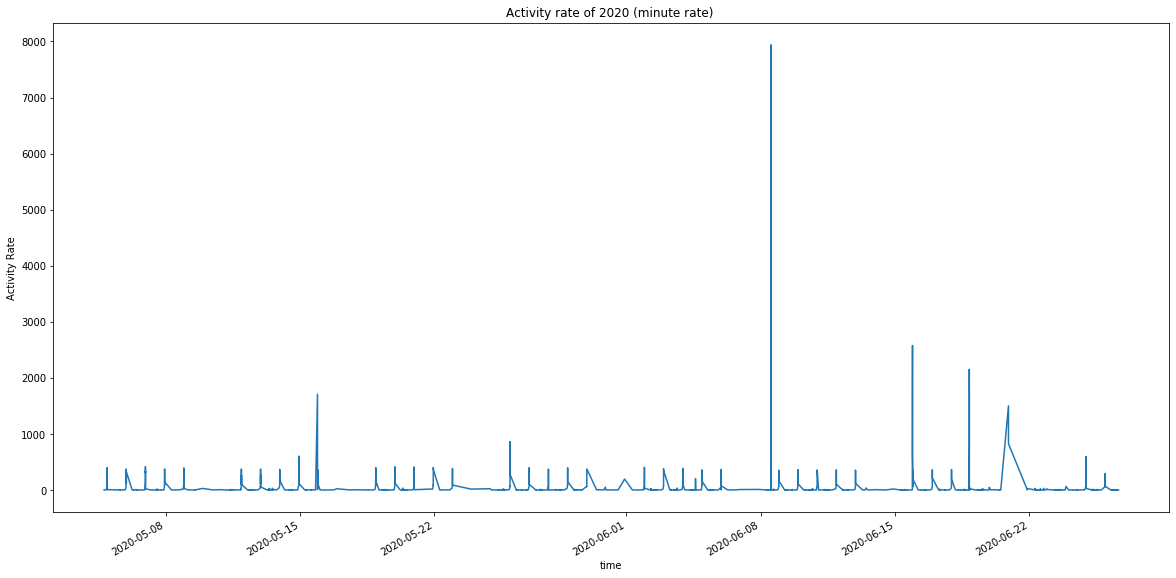

In [34]:
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Activity rate of 2020 (minute rate) ')
plt.ylabel('Activity Rate')
plt.xlabel('time')

plt.show()

In [35]:

#saving results to csv file under the results_data directory
file_csv = "evt_min_v2.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

## ALL events by seconds

In [36]:
df.columns

Index(['routing_key', 'headers.timestamp_in_ms', 'headers.node',
       'headers.name', 'headers.vhost', 'headers.consumer_tag',
       'headers.channel', 'headers.peer_port', 'headers.port',
       'headers.peer_host', 'headers.connection_type',
       'headers.user_who_performed_action', 'headers.queue', 'headers.user',
       'headers.connection', 'headers.host', 'headers.ssl_hash',
       'headers.auth_mechanism', 'headers.peer_host',
       'headers.connection_name', 'headers.connection_type', 'year', 'month',
       'day', 'hour', 'minutes', 'seconds', 'route_key', 'count'],
      dtype='object')

In [37]:
df['count'] = 0
groupped_data  = df.groupby(['year','month','day','hour','minutes','seconds',\
                                    'routing_key' ,'headers.name' ,\
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX')
m=groupped_data.max()
print(m)



print("")
print('COUNT MAX :')
m = (groupped_data.max()).iloc[0]
print(m)

print("")
print("Maximum Activity details: ")
max_act = groupped_data[groupped_data["count"]== m]
max_act


COUNT MAX
count    380
dtype: int64

COUNT MAX :
380

Maximum Activity details: 


,,,,,,,,,count
year,month,day,hour,minutes,seconds,routing_key,headers.name,headers.user_who_performed_action,
2020,6,8,13,9,42,channel.created,10.238.22.6:48840 -> 10.238.22.5:5672 (1),bus-consolesaas,380


In [38]:
groupped_data 

count
year month day hour minutes seconds routing_key        headers.name                              headers.user_who_performed_action       
2020 5     4   19   8       38      channel.created    10.238.22.7:35540 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
                    9       53      channel.created    10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
               20   30      13      channel.created    10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
                    33      58      channel.created    10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
               22   2       12      channel.created    10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
...                                                                                                                                   ...
     6     26  15   0       43      channel.created    10.238.22.6:55474 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
                    1       6       channel.created    10.238.22.6:55474 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
                    7       34      channel.created    10.238.22.6:55474 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
                    44      0       channel.created    10.238.22.8:37472 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
                                    connection.created 10.238.22.8:37472 -> 10.238.22.5:5672     bus-consolesaas                        1

[36593 rows x 1 columns]

In [39]:
upper_limit , anom = find_anomalies(groupped_data['count'])

#FETCH rows where data count is outside the limit range
groupped_data[groupped_data['count']> upper_limit ] 

DATA MEAN :
5.170087175142787
  STD : 
8.933889058907841

 Anomaly_cut_off value (aka std * 3 value) 
26.801667176723523

   LIMIT VALUES  :
upper_limit value
31.97175435186631
lower_limit value
-21.631580001580737


count
year month day hour minutes seconds routing_key     headers.name                              headers.user_who_performed_action       
2020 5     15  22   2       12      channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                       59
                            13      channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                       62
                            14      channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                       44
                            16      channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                       47
                            17      channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                       45
...                                                                                                                                ...
     6     20  22   3       9       channel.created 10.238.22.6:59072 -> 10.238.22.5:5672 (1) bus-consolesaas                       36
                            10      channel.created 10.238.22.6:59072 -> 10.238.22.5:5672 (1) bus-consolesaas                       39
                            11      channel.created 10.238.22.6:59072 -> 10.238.22.5:5672 (1) bus-consolesaas                       45
                            13      channel.created 10.238.22.6:59072 -> 10.238.22.5:5672 (1) bus-consolesaas                       47
                            14      channel.created 10.238.22.6:59072 -> 10.238.22.5:5672 (1) bus-consolesaas                       50

[195 rows x 1 columns]

In [40]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'], x['hour'], x['minutes'],x['seconds']), axis=1)
dm.drop(['year', 'month','day','hour','minutes','seconds'], axis=1, inplace=True)

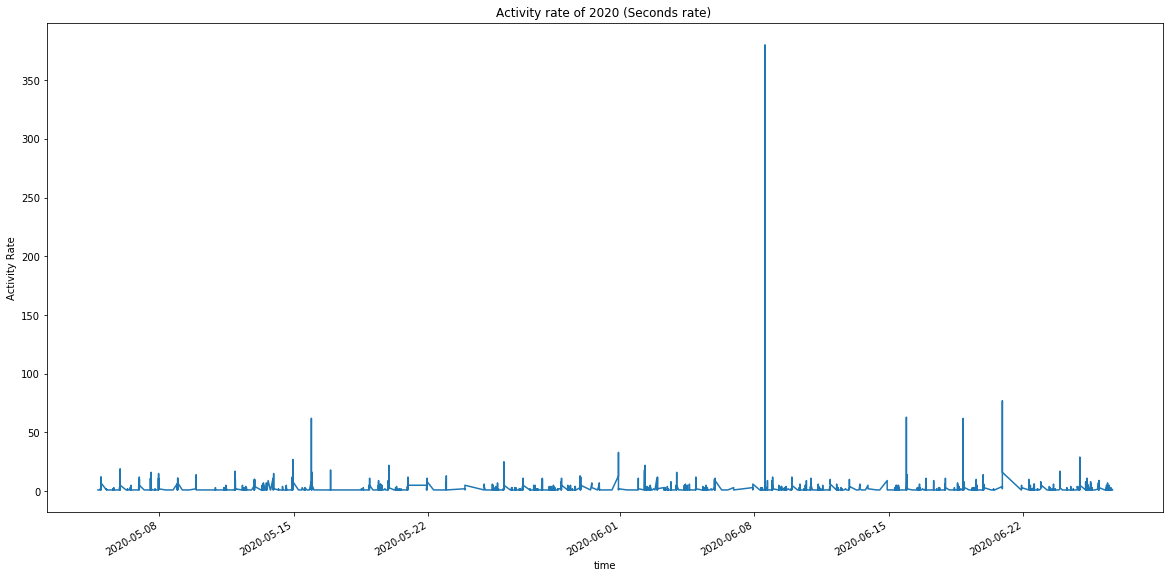

In [41]:
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Activity rate of 2020 (Seconds rate) ')
plt.ylabel('Activity Rate')
plt.xlabel('time')

plt.show()

In [42]:

#saving results to csv file under the results_data directory
file_csv = "evt_sec_v2.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

### Visualization with a modified timestamp

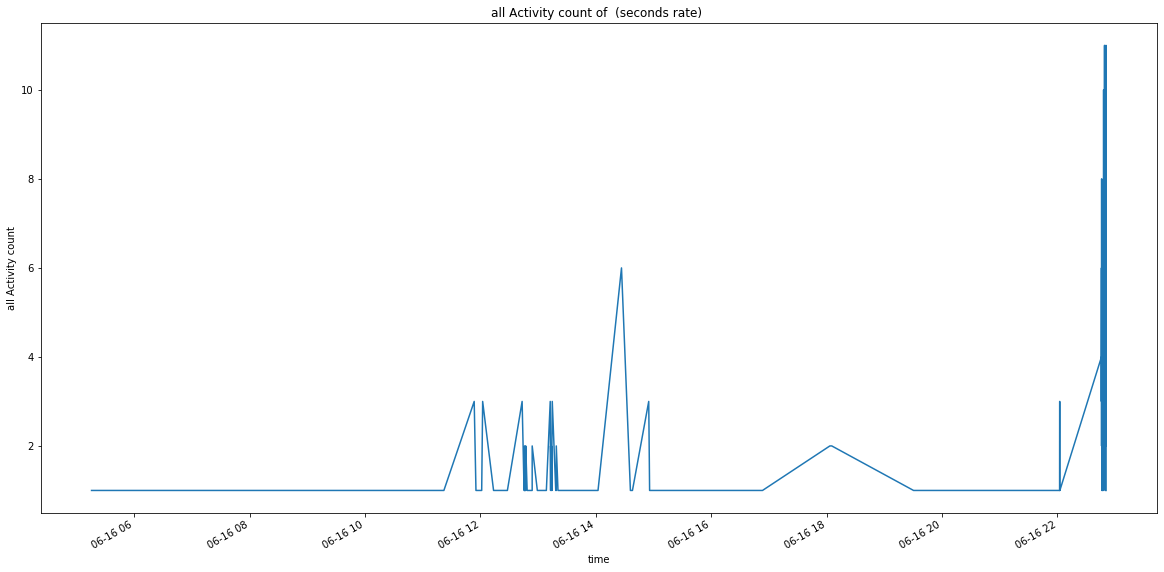

In [43]:
dm2 = dm.loc['2020-06-16':'2020-06-16']
dm2['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.gcf().autofmt_xdate()
             
plt.title('all Activity count of  (seconds rate) ')
plt.ylabel('all Activity count')
plt.xlabel('time')
plt.show() 


## Separating Dataframe based on routing key categories
The idea mainly is to study individually each group of routing keys in order to understand trends.
This enables us to analyze each events behaviour (such as connection behavior) independently from other events behaviours and therefore the possibility of a better anomaly detecting

Here we gather similar events along with their corresponding class code(based on encoding by LabelEncoder in previous steps)

    event_type    code
    connection.closed   4            
    connection.created  5          

    channel.created      3              
    channel.closed       2              


    consumer.created     6             
    consumer.deleted     7            


    binding.created     0               
    binding.deleted     1  
            
    queue.created        13            
    queue.deleted        14               

    user.tags.set                 21              
    user.created                  18            
    user.deleted                  19              
    user.authentication.failure   16       
    user.authentication.success   17    
    user.password.changed         20       

    exchange.deleted                    9
    exchange.created                    8

    topic.permission.created            15
    permission.created                  11
    permission.deleted                  12

    vhost.down                          22
    node.node.stats                     10

In [44]:

channel_ = df.loc[df['route_key'].isin([2 , 3])]
connect_ = df.loc[df['route_key'].isin([4 , 5])]
consum_ = df.loc[df['route_key'].isin([6 , 7])]
bind_ = df.loc[df['route_key'].isin([0 , 1])]
queue_ = df.loc[df['route_key'].isin([13 , 14])]
user_  = df.loc[df['route_key'].isin([16 , 17 , 18 ,19, 20 , 21])]
exchange_ = df.loc[df['route_key'].isin([8 , 9])]
perm_ = df.loc[df['route_key'].isin([11 , 12 ,15])] #includes the topic.permission.created along with permissions
stats_ = df.loc[df['route_key'].isin([10 , 22 ])]




## Channels related Events
    channel.created            
    channel.closed 

In [45]:

print(" Channel Size")
print(channel_.shape)

 Channel Size
(214334, 29)


In [46]:
groupped_data  = channel_.groupby(['year','month','day','hour','minutes',\
                                    'seconds','routing_key' ,'headers.name' ,\
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX :')
m=groupped_data.max()
print(m)
print("")
print(" Channel Groupped Data")
groupped_data



COUNT MAX :
count    380
dtype: int64

 Channel Groupped Data


count
year month day hour minutes seconds routing_key     headers.name                              headers.user_who_performed_action       
2020 5     4   19   8       38      channel.created 10.238.22.7:35540 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
                    9       53      channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
               20   30      13      channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
                    33      58      channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
               22   2       12      channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
...                                                                                                                                ...
     6     26  15   0       23      channel.created 10.238.22.6:55474 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
                            43      channel.created 10.238.22.6:55474 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
                    1       6       channel.created 10.238.22.6:55474 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
                    7       34      channel.created 10.238.22.6:55474 -> 10.238.22.5:5672 (1) bus-consolesaas                        1
                    44      0       channel.created 10.238.22.8:37472 -> 10.238.22.5:5672 (1) bus-consolesaas                        1

[36397 rows x 1 columns]

In [47]:
a, b =mad_based_outlier(groupped_data['count'])
print(a)
b
print('')
print('MAD Outlier detection')
print('Threshold')
anom = groupped_data[b].copy()
anom


median
[5.]

diff
[4. 4. 4. ... 4. 4. 4.]

med abs deviation
1.0

modified z score 
[2.698 2.698 2.698 ... 2.698 2.698 2.698]
[2.698 2.698 2.698 ... 2.698 2.698 2.698]

MAD Outlier detection
Threshold


count
year month day hour minutes seconds routing_key     headers.name                              headers.user_who_performed_action       
2020 5     4   22   51      58      channel.created 10.238.22.7:35540 -> 10.238.22.5:5672 (1) bus-consolesaas                       12
                    52      12      channel.created 10.238.22.7:35540 -> 10.238.22.5:5672 (1) bus-consolesaas                       11
                    58      47      channel.created 10.238.22.7:35540 -> 10.238.22.5:5672 (1) bus-consolesaas                       11
                    59      3       channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                       11
                            6       channel.created 10.238.22.7:35540 -> 10.238.22.5:5672 (1) bus-consolesaas                       12
...                                                                                                                                ...
     6     24  22   56      6       channel.created 10.238.22.6:55474 -> 10.238.22.5:5672 (1) bus-consolesaas                       14
                            7       channel.created 10.238.22.7:38992 -> 10.238.22.5:5672 (1) bus-consolesaas                       14
                            32      channel.created 10.238.22.6:55474 -> 10.238.22.5:5672 (1) bus-consolesaas                       17
                    57      6       channel.created 10.238.22.6:55474 -> 10.238.22.5:5672 (1) bus-consolesaas                       11
           25  7    50      48      channel.created 10.238.22.7:38992 -> 10.238.22.5:5672 (1) bus-consolesaas                       11

[1096 rows x 1 columns]

In [48]:
print(" CHANNELS EVENTS STATS :")
upper_limit, anom = find_anomalies(groupped_data['count'])

groupped_data[groupped_data['count']> upper_limit ] 

 CHANNELS EVENTS STATS :
DATA MEAN :
5.192543341484188
  STD : 
8.95265493551176

 Anomaly_cut_off value (aka std * 3 value) 
26.85796480653528

   LIMIT VALUES  :
upper_limit value
32.05050814801947
lower_limit value
-21.66542146505109


count
year month day hour minutes seconds routing_key     headers.name                              headers.user_who_performed_action       
2020 5     15  22   2       12      channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                       59
                            13      channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                       62
                            14      channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                       44
                            16      channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                       47
                            17      channel.created 10.238.22.6:55420 -> 10.238.22.5:5672 (1) bus-consolesaas                       45
...                                                                                                                                ...
     6     20  22   3       9       channel.created 10.238.22.6:59072 -> 10.238.22.5:5672 (1) bus-consolesaas                       36
                            10      channel.created 10.238.22.6:59072 -> 10.238.22.5:5672 (1) bus-consolesaas                       39
                            11      channel.created 10.238.22.6:59072 -> 10.238.22.5:5672 (1) bus-consolesaas                       45
                            13      channel.created 10.238.22.6:59072 -> 10.238.22.5:5672 (1) bus-consolesaas                       47
                            14      channel.created 10.238.22.6:59072 -> 10.238.22.5:5672 (1) bus-consolesaas                       50

[192 rows x 1 columns]

In [49]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'],\
                                          x['hour'], x['minutes'],x['seconds']), axis=1)


### Channels activity Visualization 

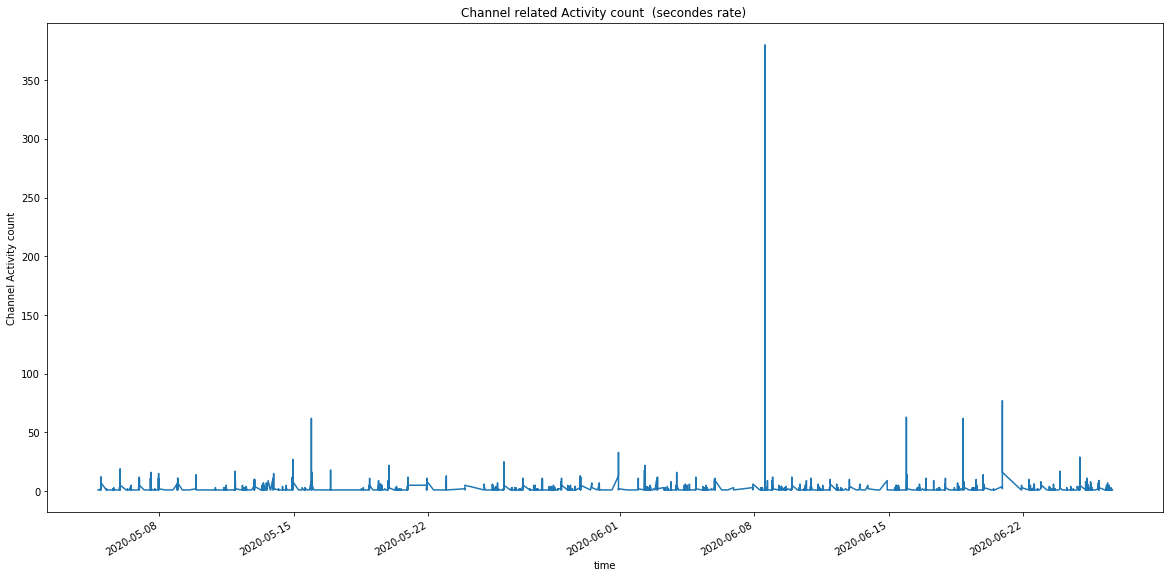

In [50]:

dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.gcf().autofmt_xdate()
             
plt.title('Channel related Activity count  (secondes rate) ')
plt.ylabel('Channel Activity count')
plt.xlabel('time')
plt.show() 



In [51]:

dm.drop(['year', 'month','day','hour','minutes','seconds'], axis=1, inplace=True)
dm.head()

#saving results to csv file under the results_data directory
file_csv = "channels_v2.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

## Connection related Events
    connection.closed            
    connection.created

In [52]:
groupped_data  = connect_.groupby(['year','month','day','hour','minutes',\
                                    'seconds','routing_key' ,'headers.name' ,\
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX :')
m = groupped_data.max()
print(m)
groupped_data


COUNT MAX :
count    1
dtype: int64


count
year month day hour minutes seconds routing_key        headers.name                          headers.user_who_performed_action       
2020 5     12  10   46      59      connection.created 10.238.22.7:49042 -> 10.238.22.5:5672 bus-consolesaas                        1
                                                       10.238.22.7:49044 -> 10.238.22.5:5672 bus-consolesaas                        1
                                                       10.238.22.7:49046 -> 10.238.22.5:5672 bus-consolesaas                        1
           14  14   0       30      connection.created 10.238.22.6:37974 -> 10.238.22.5:5672 bus-relay                              1
                            35      connection.created 10.238.22.6:37976 -> 10.238.22.5:5672 bus-relay                              1
...                                                                                                                               ...
     6     24  19   14      56      connection.created 10.238.22.7:38990 -> 10.238.22.5:5672 bus-consolesaas                        1
                                                       10.238.22.7:38992 -> 10.238.22.5:5672 bus-consolesaas                        1
                                                       10.238.22.7:38994 -> 10.238.22.5:5672 bus-consolesaas                        1
           26  14   37      13      connection.created 10.238.22.6:48462 -> 10.238.22.5:5672 bus-consolesaas                        1
               15   44      0       connection.created 10.238.22.8:37472 -> 10.238.22.5:5672 bus-consolesaas                        1

[151 rows x 1 columns]

In [53]:
print(" CONNECTION EVENTS STATS :")
upper_limit, anom = find_anomalies(groupped_data['count'])

#FETCH rows where data count is outside the limit range
groupped_data[groupped_data['count']> upper_limit ] 

 CONNECTION EVENTS STATS :
DATA MEAN :
1.0
  STD : 
0.0

 Anomaly_cut_off value (aka std * 3 value) 
0.0

   LIMIT VALUES  :
upper_limit value
1.0
lower_limit value
1.0


,,,,,,,,,count
year,month,day,hour,minutes,seconds,routing_key,headers.name,headers.user_who_performed_action,


In [54]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'],\
                                          x['hour'] , x['minutes'],x['seconds']), axis=1)


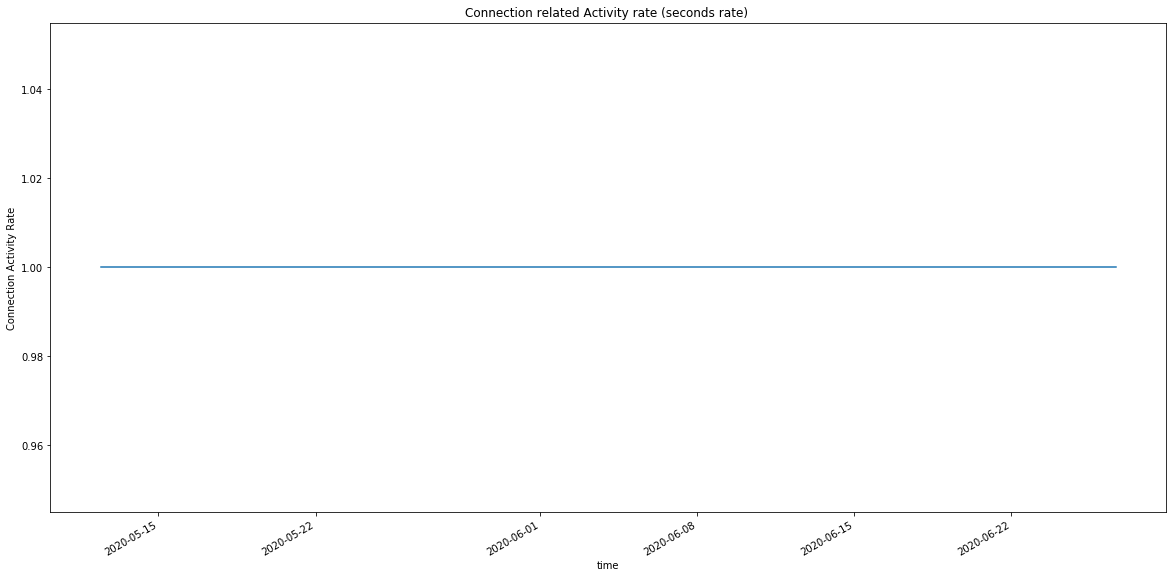

In [55]:
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Connection related Activity rate (seconds rate) ')
plt.ylabel('Connection Activity Rate')
plt.xlabel('time')

plt.show()

In [56]:
dm.drop(['year', 'month','day','hour','minutes','seconds'], axis=1, inplace=True)
dm.head()

#saving results to csv file under the results_data directory
file_csv = "connect_v2.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

## Consummer related Events
    consumer.created                 
    consumer.deleted                


In [57]:

print(" Consummer Size")
print(consum_.shape)

 Consummer Size
(42, 29)


In [58]:
consum_.head()

,routing_key,headers.timestamp_in_ms,headers.node,headers.name,headers.vhost,headers.consumer_tag,headers.channel,headers.peer_port,headers.port,headers.peer_host,headers.connection_type,headers.user_who_performed_action,headers.queue,headers.user,headers.connection,headers.host,headers.ssl_hash,headers.auth_mechanism,headers.peer_host,headers.connection_name,headers.connection_type,year,month,day,hour,minutes,seconds,route_key,count
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-14 14:08:38+00:00,exchange.created,1589465318668,NaN,NaN,/relay,NaN,NaN,NaN,NaN,NaN,NaN,admin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,5,14,14,8,38,7,0
2020-05-14 14:08:38+00:00,exchange.created,1589465318713,NaN,amq.direct,/relay,NaN,NaN,NaN,NaN,NaN,NaN,admin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,5,14,14,8,38,7,0
2020-05-14 14:08:38+00:00,exchange.created,1589465318746,NaN,amq.topic,/relay,NaN,NaN,NaN,NaN,NaN,NaN,admin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,5,14,14,8,38,7,0
2020-05-14 14:08:38+00:00,exchange.created,1589465318779,NaN,amq.match,/relay,NaN,NaN,NaN,NaN,NaN,NaN,admin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,5,14,14,8,38,7,0
2020-05-14 14:08:38+00:00,exchange.created,1589465318795,NaN,amq.headers,/relay,NaN,NaN,NaN,NaN,NaN,NaN,admin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,5,14,14,8,38,7,0


In [59]:
groupped_data  = consum_.groupby(['year','month','day','hour','minutes',\
                                   'seconds' ,'routing_key' ,#'headers.name' ,\
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX :')
m = groupped_data.max()
print(m)

groupped_data


COUNT MAX :
count    7
dtype: int64


count
year month day hour minutes seconds routing_key      headers.user_who_performed_action       
2020 5     14  14   8       38      exchange.created admin                                  7
                    11      28      consumer.deleted rmq-internal                           3
                    28      24      consumer.deleted rmq-internal                           3
                    35      9       consumer.deleted rmq-internal                           3
                    36      26      consumer.deleted rmq-internal                           3
               15   0       35      consumer.deleted rmq-internal                           3
           26  8    28      36      consumer.deleted rmq-internal                           3
     6     8   12   44      26      exchange.created bus-portal                             2
                    45      48      consumer.deleted bus-portal                             2
                    47      15      consumer.deleted rmq-internal                           2
                            35      consumer.deleted rmq-internal                           2
               13   17      19      consumer.deleted bus-portal                             2
           19  11   40      5       consumer.deleted bus-consolesaas                        3
           22  12   28      32      consumer.deleted bus-consolesaas                        3
           26  14   39      59      consumer.deleted bus-consolesaas                        1

In [60]:
print(" CONSUMMER EVENTS STATS :")
print(" MAD :")

a, b =mad_based_outlier(groupped_data['count'])
print(a)
print('')
print('MAD Outlier detection')

anom = groupped_data[b].copy()
print('Threshold')
print(anom.min())
anom

 CONSUMMER EVENTS STATS :
 MAD :

median
[3.]

diff
[4. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 2.]

med abs deviation
0.0

modified z score 
[inf nan nan nan nan nan nan inf inf inf inf inf nan nan inf]
[inf nan nan nan nan nan nan inf inf inf inf inf nan nan inf]

MAD Outlier detection
Threshold
count    1
dtype: int64


C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in greater


count
year month day hour minutes seconds routing_key      headers.user_who_performed_action       
2020 5     14  14   8       38      exchange.created admin                                  7
     6     8   12   44      26      exchange.created bus-portal                             2
                    45      48      consumer.deleted bus-portal                             2
                    47      15      consumer.deleted rmq-internal                           2
                            35      consumer.deleted rmq-internal                           2
               13   17      19      consumer.deleted bus-portal                             2
           26  14   39      59      consumer.deleted bus-consolesaas                        1

In [61]:

print(" STD :")
upper_limit, anom = find_anomalies(groupped_data['count'])

#FETCH rows where data count is outside the limit range
groupped_data[groupped_data['count']> upper_limit ] 

 STD :
DATA MEAN :
2.8
  STD : 
1.2754084313139327

 Anomaly_cut_off value (aka std * 3 value) 
3.826225293941798

   LIMIT VALUES  :
upper_limit value
6.626225293941798
lower_limit value
-1.0262252939417982


,,,,,,,,count
year,month,day,hour,minutes,seconds,routing_key,headers.user_who_performed_action,
2020,5,14,14,8,38,exchange.created,admin,7


In [62]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'],\
                                          x['hour'], x['minutes'],x['seconds']), axis=1)


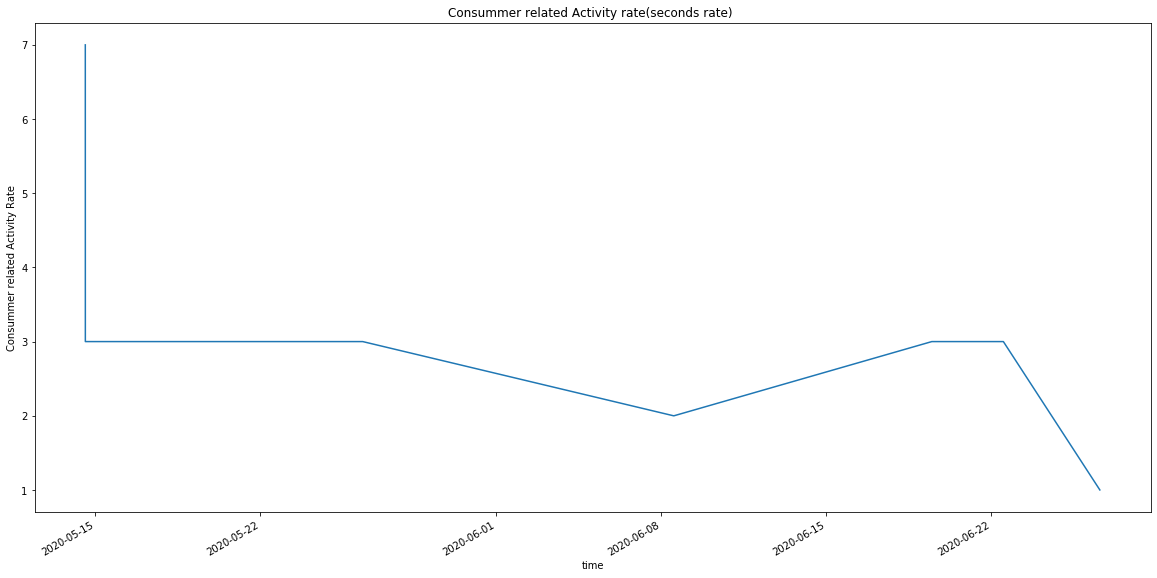

In [63]:
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Consummer related Activity rate(seconds rate) ')
plt.ylabel('Consummer related Activity Rate')
plt.xlabel('time')

plt.show()

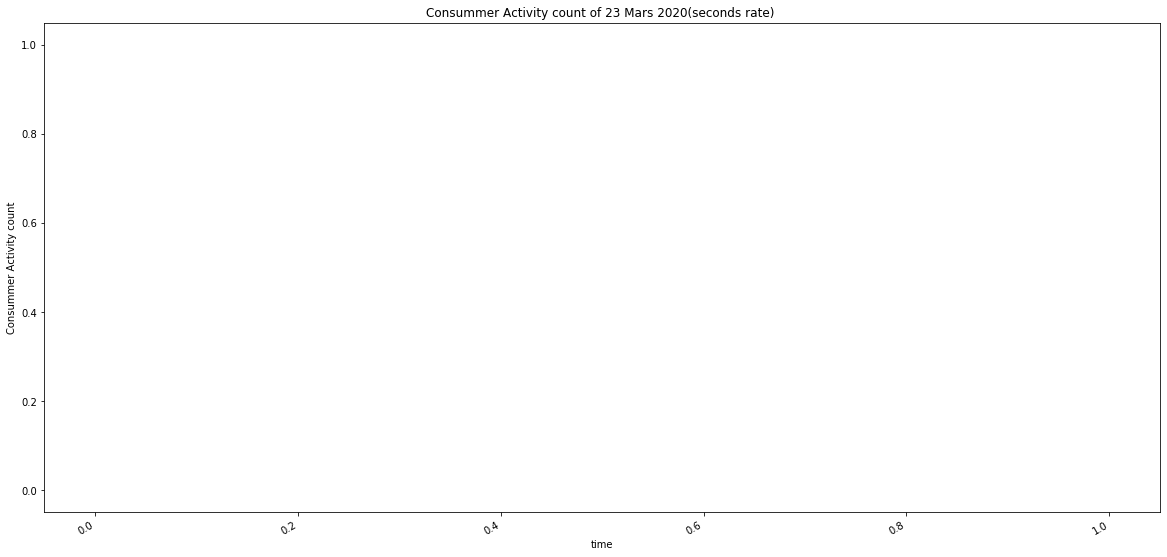

In [64]:
dm2 = dm.loc['2020-03-23':'2020-03-23']
dm2['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.gcf().autofmt_xdate()
             
plt.title('Consummer Activity count of 23 Mars 2020(seconds rate) ')
plt.ylabel('Consummer Activity count')
plt.xlabel('time')
plt.show() 

In [65]:
dm.drop(['year', 'month','day','hour','minutes','seconds'], axis=1, inplace=True)
dm.head()

#saving results to csv file under the results_data directory
file_csv = "consum_v2.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

## Binding Events 
    binding.created                
    binding.deleted     

In [66]:
bind_.head()

,routing_key,headers.timestamp_in_ms,headers.node,headers.name,headers.vhost,headers.consumer_tag,headers.channel,headers.peer_port,headers.port,headers.peer_host,headers.connection_type,headers.user_who_performed_action,headers.queue,headers.user,headers.connection,headers.host,headers.ssl_hash,headers.auth_mechanism,headers.peer_host,headers.connection_name,headers.connection_type,year,month,day,hour,minutes,seconds,route_key,count
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-04 18:07:22+00:00,binding.created,1588615642728,NaN,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN,admin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,5,4,18,7,22,0,0
2020-05-04 19:08:38+00:00,channel.closed,1588619318116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bus-consolesaas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,5,4,19,8,38,1,0
2020-05-04 19:09:53+00:00,channel.closed,1588619393600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bus-consolesaas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,5,4,19,9,53,1,0
2020-05-04 20:30:13+00:00,channel.closed,1588624213693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bus-consolesaas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,5,4,20,30,13,1,0
2020-05-04 20:33:58+00:00,channel.closed,1588624438973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bus-consolesaas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,5,4,20,33,58,1,0


In [67]:
groupped_data  = bind_.groupby(['year','month','day','hour','minutes',\
                                    'seconds','routing_key' ,#'headers.name' ,\
                                    'headers.user_who_performed_action'\
                                 ]).agg({'count': 'size'})

#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('MAX COUNT')
m = groupped_data.max()
print(m)

groupped_data


MAX COUNT
count    379
dtype: int64


count
year month day hour minutes seconds routing_key     headers.user_who_performed_action       
2020 5     4   18   7       22      binding.created admin                                  1
               19   8       38      channel.closed  bus-consolesaas                        1
                    9       53      channel.closed  bus-consolesaas                        1
               20   30      13      channel.closed  bus-consolesaas                        1
                    33      58      channel.closed  bus-consolesaas                        1
...                                                                                      ...
     6     26  14   59      47      channel.closed  bus-consolesaas                        1
               15   0       23      channel.closed  bus-consolesaas                        1
                            43      channel.closed  bus-consolesaas                        1
                    1       6       channel.closed  bus-consolesaas                        1
                    7       34      channel.closed  bus-consolesaas                        1

[21633 rows x 1 columns]

In [68]:
print(" BINDING EVENTS STATS :")
upper_limit, anom = find_anomalies(groupped_data['count'])

#FETCH rows where data count is outside the limit range
groupped_data[groupped_data['count']> upper_limit ] 

 BINDING EVENTS STATS :
DATA MEAN :
8.735219340821892
  STD : 
12.141889336124477

 Anomaly_cut_off value (aka std * 3 value) 
36.42566800837343

   LIMIT VALUES  :
upper_limit value
45.16088734919532
lower_limit value
-27.690448667551536


count
year month day hour minutes seconds routing_key    headers.user_who_performed_action       
2020 5     15  22   2       12      channel.closed bus-consolesaas                       59
                            13      channel.closed bus-consolesaas                       62
                            16      channel.closed bus-consolesaas                       47
                            20      channel.closed bus-consolesaas                       58
                            21      channel.closed bus-consolesaas                       55
...                                                                                     ...
     6     20  22   3       5       channel.closed bus-consolesaas                       63
                            6       channel.closed bus-consolesaas                       66
                            8       channel.closed bus-consolesaas                       47
                            13      channel.closed bus-consolesaas                       47
                            14      channel.closed bus-consolesaas                       49

[164 rows x 1 columns]

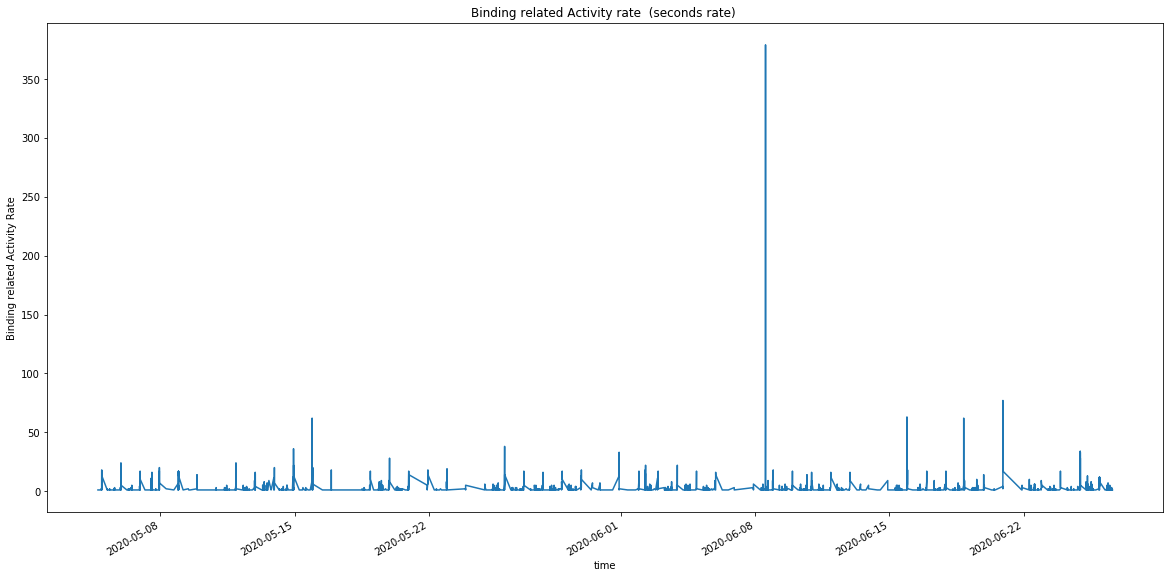

In [69]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'],\
                                          x['hour'], x['minutes'],x['seconds']), axis=1)

#plotting the activity rate figure
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Binding related Activity rate  (seconds rate) ')
plt.ylabel('Binding related Activity Rate')
plt.xlabel('time')

plt.show()

In [70]:
dm.head()

,year,month,day,hour,minutes,seconds,routing_key,headers.user_who_performed_action,count
2020-05-04 18:07:22,2020,5,4,18,7,22,binding.created,admin,1
2020-05-04 19:08:38,2020,5,4,19,8,38,channel.closed,bus-consolesaas,1
2020-05-04 19:09:53,2020,5,4,19,9,53,channel.closed,bus-consolesaas,1
2020-05-04 20:30:13,2020,5,4,20,30,13,channel.closed,bus-consolesaas,1
2020-05-04 20:33:58,2020,5,4,20,33,58,channel.closed,bus-consolesaas,1


In [71]:
#saving results to csv file under the results_data directory
file_csv = "binding_v2.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

## QUEUE EVENTS RELATED
    queue.created                 
    queue.deleted        

In [72]:
groupped_data  = queue_.groupby(['year','month','day','hour','minutes',\
                                    'seconds','routing_key' ,'headers.name' ,\
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX :')
m = groupped_data.max()
print(m)

groupped_data



COUNT MAX :
count    1
dtype: int64


count
year month day hour minutes seconds routing_key   headers.name                                       headers.user_who_performed_action       
2020 5     14  14   10      49      queue.created pubsub.default.consoleSaasApplicationRole.relay... bus-relay                              1
                                                  pubsub.default.consoleSaasClientContract.relay-... bus-relay                              1
                                                  pubsub.default.consoleSaasUserAccess.relay-cons... bus-relay                              1
     6     8   12   44      26      queue.created pubsub.default.consoleSaasApplicationRoleBootst... bus-portal                             1
                                                  pubsub.default.consoleSaasClientContractBootstr... bus-portal                             1
                    47      29      queue.created pubsub.default.consoleSaasApplicationRole.porta... bus-portal                             1
                                                  pubsub.default.consoleSaasClientContract.portal... bus-portal                             1
           10  9    10      40      queue.created console.traces                                     admin                                  1

In [73]:

print(" QUEUE EVENTS STATS :")
upper_limit, anom = find_anomalies(groupped_data['count'])

#FETCH rows where data count is outside the limit range
groupped_data[groupped_data['count']> upper_limit ] 

 QUEUE EVENTS STATS :
DATA MEAN :
1.0
  STD : 
0.0

 Anomaly_cut_off value (aka std * 3 value) 
0.0

   LIMIT VALUES  :
upper_limit value
1.0
lower_limit value
1.0


,,,,,,,,,count
year,month,day,hour,minutes,seconds,routing_key,headers.name,headers.user_who_performed_action,


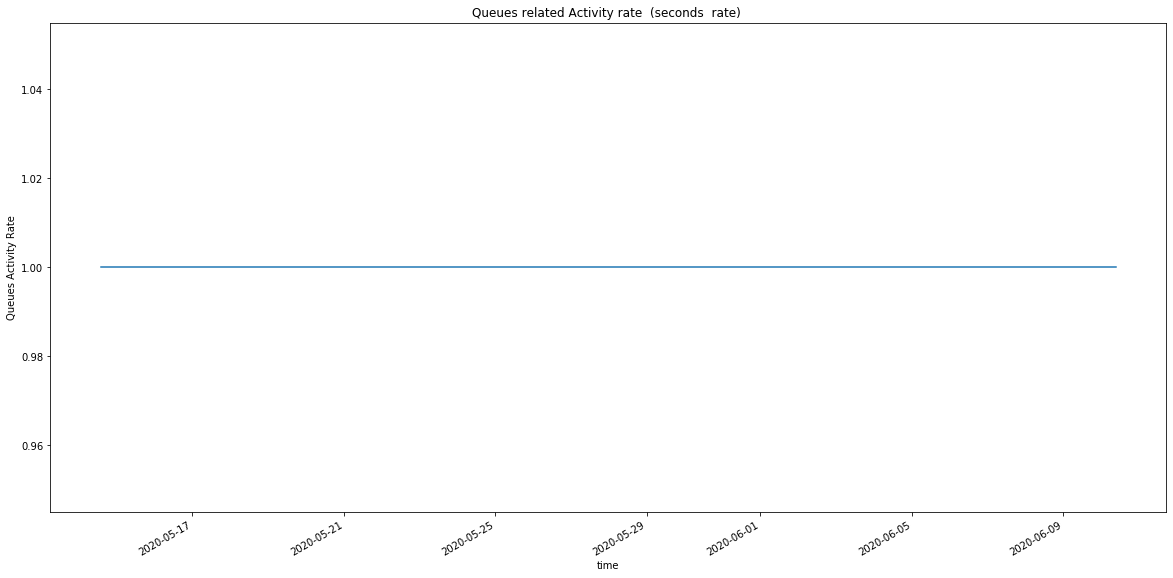

In [74]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'], \
                                          x['hour'] , x['minutes'],x['seconds']), axis=1)
#plotting the activity rate figure
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Queues related Activity rate  (seconds  rate) ')
plt.ylabel('Queues Activity Rate')
plt.xlabel('time')

plt.show()

In [75]:
#saving results to csv file under the results_data directory
file_csv = "queue_v2.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

## User Related Events
    user.tags.set                              
    user.created                             
    user.deleted                              
    user.authentication.failure         
    user.authentication.success       
    user.password.changed                  

In [76]:
groupped_data  = user_.groupby(['year','month','day','hour' , 'minutes',\
                                    'seconds','routing_key' ,'headers.name' ,\
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX :')
m = groupped_data.max()
print(m)

groupped_data


COUNT MAX :
count    1
dtype: int64


count
year month day hour minutes seconds routing_key           headers.name headers.user_who_performed_action       
2020 5     14  13   24      52      user.created          bus-relay    admin                                  1
                                    user.tags.set         bus-relay    admin                                  1
               14   8       38      vhost.created         /relay       admin                                  1
               15   24      15      vhost.deleted         /relay       admin                                  1
     6     2   13   11      11      user.created          bus-socle    admin                                  1
                                    user.tags.set         bus-socle    admin                                  1
                            23      user.password.changed bus-socle    admin                                  1
                                    user.tags.set         bus-socle    admin                                  1
           8   12   44      5       user.created          bus-portal   admin                                  1
                                    user.tags.set         bus-portal   admin                                  1

In [77]:

print(" USER EVENTS STATS :")
upper_limit, anom = find_anomalies(groupped_data['count'])

#FETCH rows where data count is outside the limit range
groupped_data[groupped_data['count']> upper_limit ] 


 USER EVENTS STATS :
DATA MEAN :
1.0
  STD : 
0.0

 Anomaly_cut_off value (aka std * 3 value) 
0.0

   LIMIT VALUES  :
upper_limit value
1.0
lower_limit value
1.0


,,,,,,,,,count
year,month,day,hour,minutes,seconds,routing_key,headers.name,headers.user_who_performed_action,


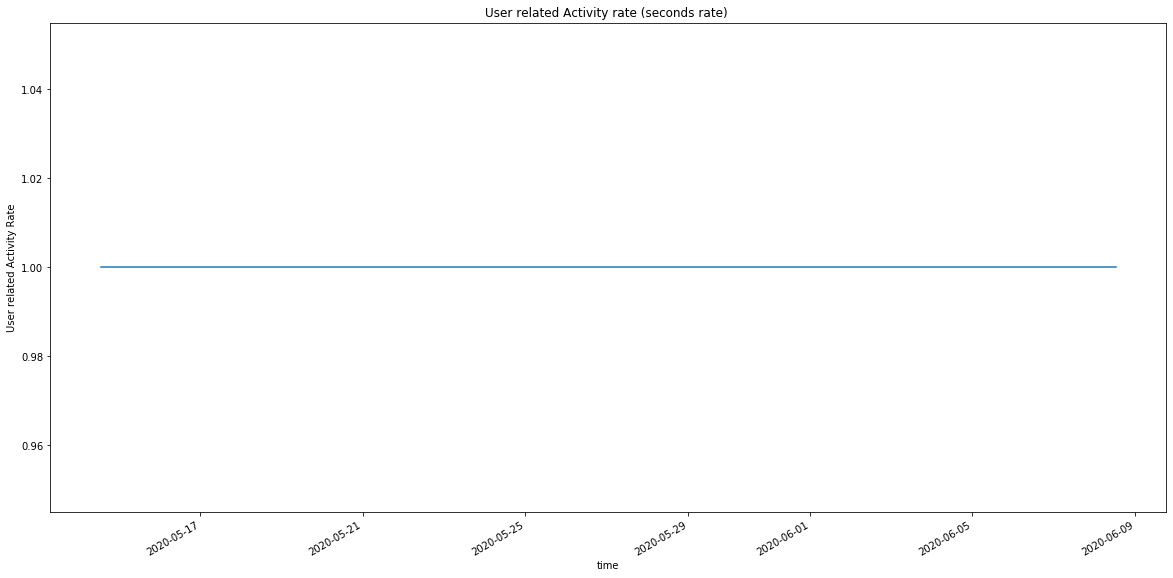

In [78]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], \
                                          x['day'], x['hour'], x['minutes'],x['seconds']), axis=1)

#plotting the activity rate figure
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('User related Activity rate (seconds rate) ')
plt.ylabel('User related Activity Rate')
plt.xlabel('time')

plt.show()

In [79]:
dm.drop(['year', 'month','day','hour','minutes','seconds'], axis=1, inplace=True)
dm.head()

#saving results to csv file under the results_data directory
file_csv = "user_v2.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

## Exchange related events
    exchange.deleted                    
    exchange.created                    

In [80]:
exchange_.isnull().sum()

routing_key                           0
headers.timestamp_in_ms               0
headers.node                         14
headers.name                          2
headers.vhost                         0
headers.consumer_tag                 14
headers.channel                      14
headers.peer_port                    14
headers.port                         14
headers.peer_host                    14
headers.connection_type              14
headers.user_who_performed_action     0
headers.queue                        14
headers.user                         14
headers.connection                   14
headers.host                         14
headers.ssl_hash                     14
headers.auth_mechanism               14
headers.peer_host                    14
headers.connection_name              14
headers.connection_type              14
year                                  0
month                                 0
day                                   0
hour                                  0


In [81]:
groupped_data  = exchange_.groupby(['year','month','day','hour','minutes',\
                                    'seconds','routing_key' ,'headers.name' ,\
                                    'headers.user_who_performed_action'\
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX :')
m = groupped_data.max()
print(m)

groupped_data


COUNT MAX :
count    1
dtype: int64


count
year month day hour minutes seconds routing_key       headers.name       headers.user_who_performed_action       
2020 5     14  15   24      15      exchange.deleted  amq.direct         admin                                  1
                                                      amq.fanout         admin                                  1
                                                      amq.headers        admin                                  1
                                                      amq.match          admin                                  1
                                                      amq.rabbitmq.trace admin                                  1
                                                      amq.topic          admin                                  1
                                    parameter.cleared amq.direct         admin                                  1
                                                      amq.fanout         admin                                  1
                                                      amq.headers        admin                                  1
                                                      amq.match          admin                                  1
                                                      amq.rabbitmq.trace admin                                  1
                                                      amq.topic          admin                                  1

In [82]:
print(" exchange EVENTS STATS :")
upper_limit, anom = find_anomalies(groupped_data['count'])

groupped_data[groupped_data['count']> upper_limit ] 

 exchange EVENTS STATS :
DATA MEAN :
1.0
  STD : 
0.0

 Anomaly_cut_off value (aka std * 3 value) 
0.0

   LIMIT VALUES  :
upper_limit value
1.0
lower_limit value
1.0


,,,,,,,,,count
year,month,day,hour,minutes,seconds,routing_key,headers.name,headers.user_who_performed_action,


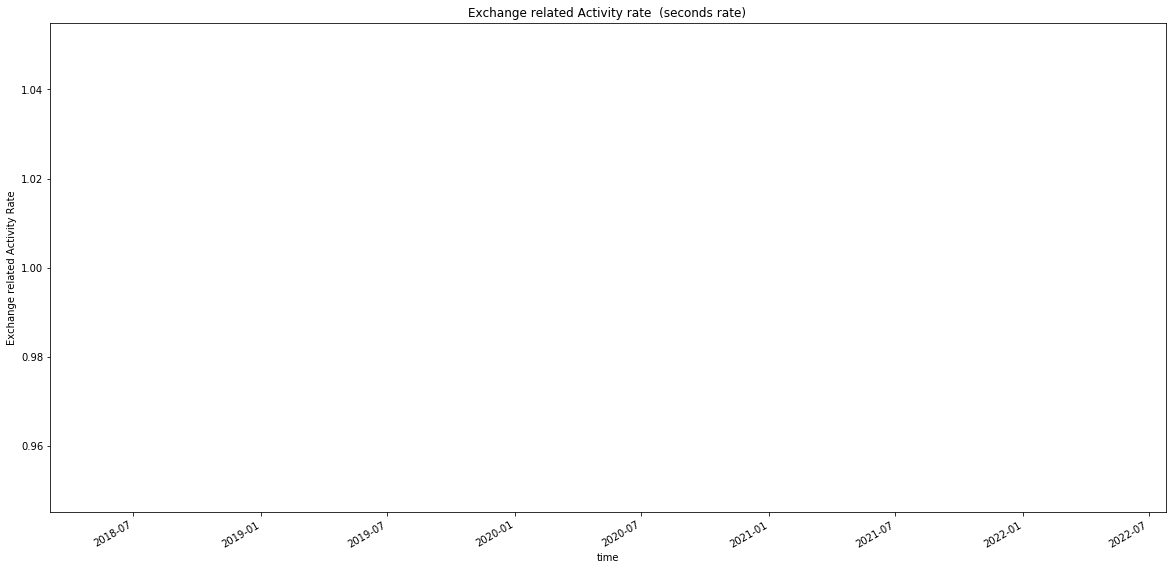

In [83]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'], x['hour'],\
                                          x['minutes'],x['seconds']), axis=1)

#plotting the activity rate figure
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Exchange related Activity rate  (seconds rate) ')
plt.ylabel('Exchange related Activity Rate')
plt.xlabel('time')

plt.show()

In [84]:
#saving results to csv file under the results_data directory
file_csv = "exchange_v2.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

In [85]:
dm.head()

,year,month,day,hour,minutes,seconds,routing_key,headers.name,headers.user_who_performed_action,count
2020-05-14 15:24:15,2020,5,14,15,24,15,exchange.deleted,amq.direct,admin,1
2020-05-14 15:24:15,2020,5,14,15,24,15,exchange.deleted,amq.fanout,admin,1
2020-05-14 15:24:15,2020,5,14,15,24,15,exchange.deleted,amq.headers,admin,1
2020-05-14 15:24:15,2020,5,14,15,24,15,exchange.deleted,amq.match,admin,1
2020-05-14 15:24:15,2020,5,14,15,24,15,exchange.deleted,amq.rabbitmq.trace,admin,1


## Permission related Events 
    topic.permission.created            
    permission.created                  
    permission.deleted                  


In [86]:
perm_.head(2)

,routing_key,headers.timestamp_in_ms,headers.node,headers.name,headers.vhost,headers.consumer_tag,headers.channel,headers.peer_port,headers.port,headers.peer_host,headers.connection_type,headers.user_who_performed_action,headers.queue,headers.user,headers.connection,headers.host,headers.ssl_hash,headers.auth_mechanism,headers.peer_host,headers.connection_name,headers.connection_type,year,month,day,hour,minutes,seconds,route_key,count
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-14 13:24:58+00:00,permission.created,1589462698530,NaN,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN,admin,NaN,bus-relay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,5,14,13,24,58,11,0
2020-05-14 14:08:38+00:00,permission.created,1589465318821,NaN,NaN,/relay,NaN,NaN,NaN,NaN,NaN,NaN,admin,NaN,admin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,5,14,14,8,38,11,0


*notes:* 
   
       we notice that the columns "headers.node" "headers.name" "user_who_performed" are null values ,therefore we 
    group by date and routing key only

In [87]:
groupped_data  = perm_.groupby(['year','month','day','hour','minutes',\
                                    'seconds','routing_key' \
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX :')
m = groupped_data.max()
print(m)

groupped_data


COUNT MAX :
count    2
dtype: int64


count
year month day hour minutes seconds routing_key                       
2020 5     14  13   24      58      permission.created               1
               14   8       38      permission.created               1
                            50      permission.created               1
               15   24      15      permission.deleted               2
     6     2   13   11      34      permission.created               1
           8   12   43      9       user.authentication.failure      1
                            15      user.authentication.failure      1
                            21      user.authentication.failure      1
                            28      user.authentication.failure      1
                            34      user.authentication.failure      1
                            42      user.authentication.failure      1
                            51      user.authentication.failure      1
                    44      3       user.authentication.failure      1
                            9       permission.created               1

In [88]:
print(" Permissions EVENTS STATS :")
upper_limit, anom = find_anomalies(groupped_data['count'])

#FETCH rows where data count is outside the limit range
groupped_data[groupped_data['count']> upper_limit ] 

 Permissions EVENTS STATS :
DATA MEAN :
1.0714285714285714
  STD : 
0.2575393768188563

 Anomaly_cut_off value (aka std * 3 value) 
0.7726181304565689

   LIMIT VALUES  :
upper_limit value
1.8440467018851403
lower_limit value
0.2988104409720025


,,,,,,,count
year,month,day,hour,minutes,seconds,routing_key,
2020,5,14,15,24,15,permission.deleted,2


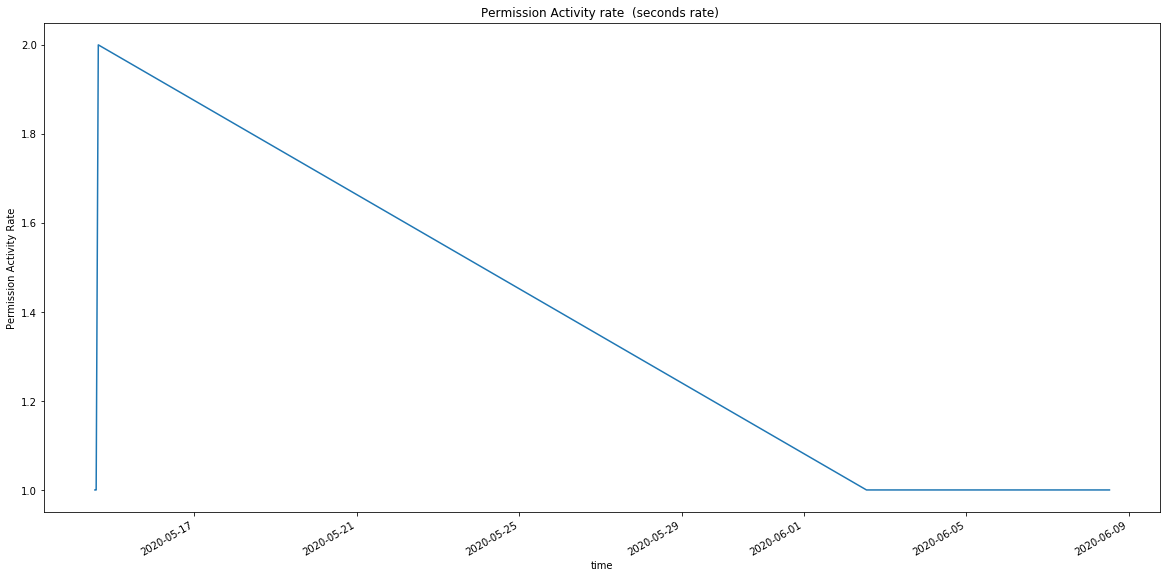

In [89]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'], \
                                          x['hour'], x['minutes'],x['seconds']), axis=1)

#plotting the activity rate figure
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Permission Activity rate  (seconds rate) ')
plt.ylabel('Permission Activity Rate')
plt.xlabel('time')

plt.show()

In [90]:
dm.head()

,year,month,day,hour,minutes,seconds,routing_key,count
2020-05-14 13:24:58,2020,5,14,13,24,58,permission.created,1
2020-05-14 14:08:38,2020,5,14,14,8,38,permission.created,1
2020-05-14 14:08:50,2020,5,14,14,8,50,permission.created,1
2020-05-14 15:24:15,2020,5,14,15,24,15,permission.deleted,2
2020-06-02 13:11:34,2020,6,2,13,11,34,permission.created,1


In [91]:

dm.drop(['year', 'month','day','hour','minutes'], axis=1, inplace=True)

#saving results to csv file under the results_data directory
file_csv = "perm_v2.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

*note*
       
     we can export the current results to csv file for further use

## Stats Events
    vhost.down                          
    node.node.stats                     

In [92]:
stats_.head()#6 rows × 28 columns
#stats_.isnull().sum()

,routing_key,headers.timestamp_in_ms,headers.node,headers.name,headers.vhost,headers.consumer_tag,headers.channel,headers.peer_port,headers.port,headers.peer_host,headers.connection_type,headers.user_who_performed_action,headers.queue,headers.user,headers.connection,headers.host,headers.ssl_hash,headers.auth_mechanism,headers.peer_host,headers.connection_name,headers.connection_type,year,month,day,hour,minutes,seconds,route_key,count
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-14 15:24:15+00:00,parameter.set,1589469855281,NaN,amq.topic,/relay,NaN,NaN,NaN,NaN,NaN,NaN,admin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,5,14,15,24,15,10,0
2020-05-14 15:24:15+00:00,parameter.set,1589469855392,NaN,amq.headers,/relay,NaN,NaN,NaN,NaN,NaN,NaN,admin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,5,14,15,24,15,10,0
2020-05-14 15:24:15+00:00,parameter.set,1589469855453,NaN,amq.direct,/relay,NaN,NaN,NaN,NaN,NaN,NaN,admin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,5,14,15,24,15,10,0
2020-05-14 15:24:15+00:00,parameter.set,1589469855462,NaN,amq.fanout,/relay,NaN,NaN,NaN,NaN,NaN,NaN,admin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,5,14,15,24,15,10,0
2020-05-14 15:24:15+00:00,parameter.set,1589469855471,NaN,amq.match,/relay,NaN,NaN,NaN,NaN,NaN,NaN,admin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,5,14,15,24,15,10,0


In [93]:

groupped_data  = stats_.groupby(['year','month','day','hour','minutes',\
                                    'seconds','routing_key' ,'headers.name' ,\
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX :')
m = groupped_data.max()
print(m)

groupped_data


COUNT MAX :
count    1
dtype: int64


count
year month day hour minutes seconds routing_key   headers.name       headers.user_who_performed_action       
2020 5     14  15   24      15      parameter.set amq.direct         admin                                  1
                                                  amq.fanout         admin                                  1
                                                  amq.headers        admin                                  1
                                                  amq.match          admin                                  1
                                                  amq.rabbitmq.trace admin                                  1
                                                  amq.topic          admin                                  1
                                    vhost.down    /relay             rmq-internal                           1